In [49]:
# load requirments

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

In [50]:
import keras
from keras.datasets import cifar10

# load pre-suffeled train and test data

(X_train,y_train) , (X_test,y_test) = cifar10.load_data()

In [51]:
X_train.shape

(50000, 32, 32, 3)

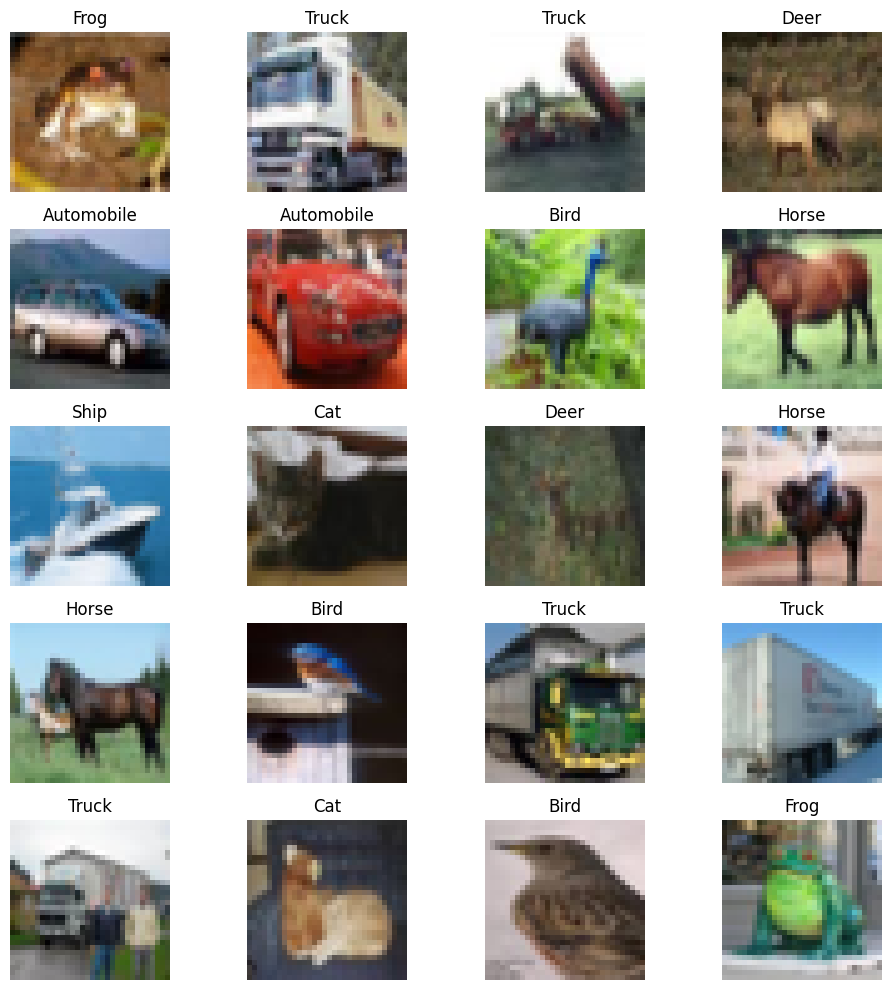

In [52]:
# visualise images


# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5 ,4 ,i+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.title(class_names[y_train[i][0]])  # Access the class name using y_train[i][0]
    plt.axis("off")
plt.tight_layout()

In [53]:
# Scale the images

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [54]:
# ONE - HOT Encoding
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))

y_train = to_categorical(y_train , num_classes)
y_test = to_categorical(y_test , num_classes)

In [55]:
X_train.shape ,X_valid.shape

((50000, 32, 32, 3), (5000, 32, 32, 3))

In [56]:
# Break dataset into train and validation

(X_train , X_valid) = X_train[5000:],X_train[:5000]
(y_train , y_valid) = y_train[5000:],y_train[:5000]

In [57]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout

# build model
model = Sequential()

model.add(Conv2D(filters=16 ,kernel_size=3 ,padding='same' ,activation='relu' ,input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32 ,kernel_size=3 ,padding='same' ,activation='relu' ))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64 ,kernel_size=3 ,padding='same' ,activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(500 , activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10 , activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 64)         

In [59]:
# compile the model

model.compile(optimizer='adam' ,loss='categorical_crossentropy' ,metrics=['accuracy'])

In [60]:
# import model checkpointer

from keras.callbacks import ModelCheckpoint
check_pointer = ModelCheckpoint(filepath='model.weights.best.hdf5' ,
                                monitor='val_accuracy' ,
                                save_best_only=True ,
                                mode='max',
                               verbose=1)

In [61]:
# train the model

history = model.fit(X_train,y_train ,batch_size=32 ,epochs=10 ,
                    validation_data=(X_valid,y_valid) ,callbacks=[check_pointer] ,
                    verbose=1 ,shuffle=True)

Epoch 1/10
1405/1407 [============================>.] - ETA: 0s - loss: 1.5561 - accuracy: 0.4299
Epoch 1: val_accuracy improved from -inf to 0.55060, saving model to model.weights.best.hdf5
1407/1407 [==============================] - 8s 5ms/step - loss: 1.5558 - accuracy: 0.4300 - val_loss: 1.2417 - val_accuracy: 0.5506
Epoch 2/10
  24/1407 [..............................] - ETA: 6s - loss: 1.2988 - accuracy: 0.5352

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1407/1407 [==============================] - ETA: 0s - loss: 1.2196 - accuracy: 0.5623
Epoch 2: val_accuracy improved from 0.55060 to 0.60960, saving model to model.weights.best.hdf5
1407/1407 [==============================] - 8s 5ms/step - loss: 1.2196 - accuracy: 0.5623 - val_loss: 1.0995 - val_accuracy: 0.6096
Epoch 3/10
1404/1407 [============================>.] - ETA: 0s - loss: 1.0769 - accuracy: 0.6160
Epoch 3: val_accuracy improved from 0.60960 to 0.66060, saving model to model.weights.best.hdf5
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0768 - accuracy: 0.6160 - val_loss: 0.9595 - val_accuracy: 0.6606
Epoch 4/10
1401/1407 [============================>.] - ETA: 0s - loss: 0.9914 - accuracy: 0.6462
Epoch 4: val_accuracy improved from 0.66060 to 0.69440, saving model to model.weights.best.hdf5
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9917 - accuracy: 0.6461 - val_loss: 0.8751 - val_accuracy: 0.6944
Epoch 5/10
1402/1407 [========

In [62]:
# load the saved model

model.load_weights("model.weights.best.hdf5")

In [63]:
# make prediction for unseen data

y_hat = model.predict(X_test)
y_hat = y_hat > 0.5

313/313 [==============================] - 1s 2ms/step


In [64]:
# evaluate model's performance

score = model.evaluate(X_test,y_test)
score = 100*score[1]
print(f"The Model's Score is : {score}")

313/313 [==============================] - 1s 4ms/step - loss: 0.7682 - accuracy: 0.7361
The Model's Score is : 73.61000180244446


In [65]:
# define text labels
cifar10_labels = ['airplane' ,'automobile' ,'bird' ,'cat' ,'deer' ,'dog' ,'frog' ,'horse' ,'ship' ,'truck']

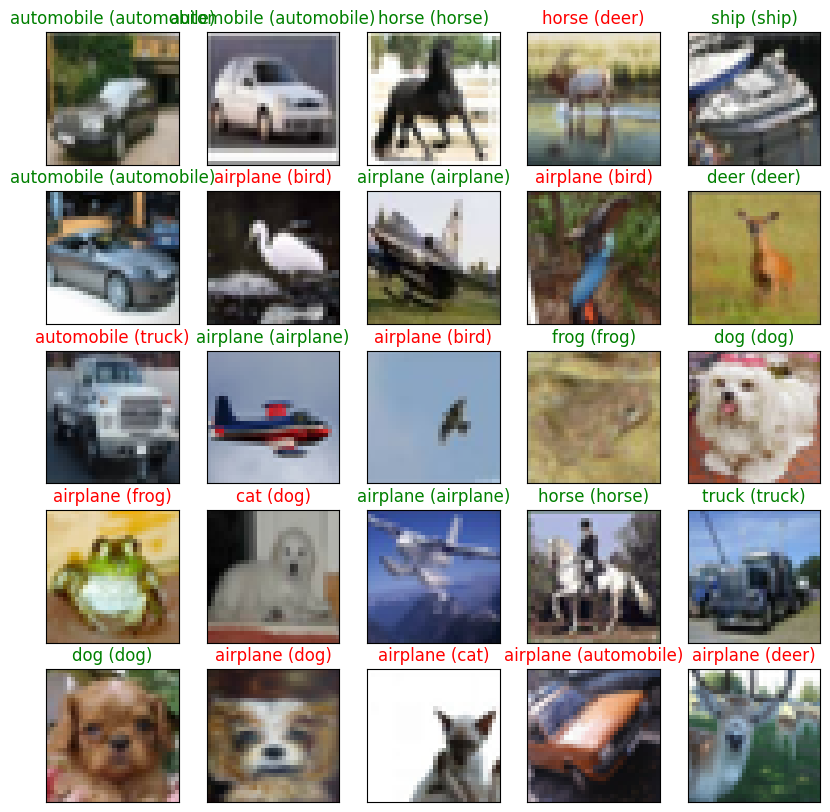

In [66]:
# predict random sample of test images with their actual labels and predicted labels

fig = plt.figure(figsize=(10,10))    # define canvas size
for i , idx in enumerate(np.random.choice(X_test.shape[0] ,size=25 ,replace=False)) :
  ax = fig.add_subplot(5 ,5 ,i+1 ,xticks=[] ,yticks=[])
  ax.imshow(np.squeeze(X_test[idx]))
  pred_idx = np.argmax(y_hat[idx])
  true_idx = np.argmax(y_test[idx])
  ax.set_title("{} ({})".format(cifar10_labels[pred_idx] ,cifar10_labels[true_idx]) ,
               color = ("green" if pred_idx==true_idx else "red"))

            ______________________________ END ______________________________